In [19]:
#!pip install numpy scipy matplotlib librosa
!pip install soundfile


In [20]:
from pydub import AudioSegment
import os
import shutil
import wave
import librosa
import matplotlib.pyplot as plt
import soundfile as sf


In [25]:
audio_path = "../input/Radio Contacto Sur - Contacto Sur Noticias - 14.09.2023.mp3"
temp_dir = "../output/"
export_path = "test.wav"

In [26]:
audio_data, sample_rate = librosa.load(audio_path)

In [53]:
audio_test = audio_data[abs(audio_data)>0.05]

In [54]:
len(audio_data)

153820448

In [55]:
len(audio_test)

63022552

In [56]:
sf.write(os.path.join(temp_dir, export_path), audio_test, sample_rate)


In [57]:
audio_test.export(os.path.join(temp_dir, export_path), format="wav")

AttributeError: 'numpy.ndarray' object has no attribute 'export'

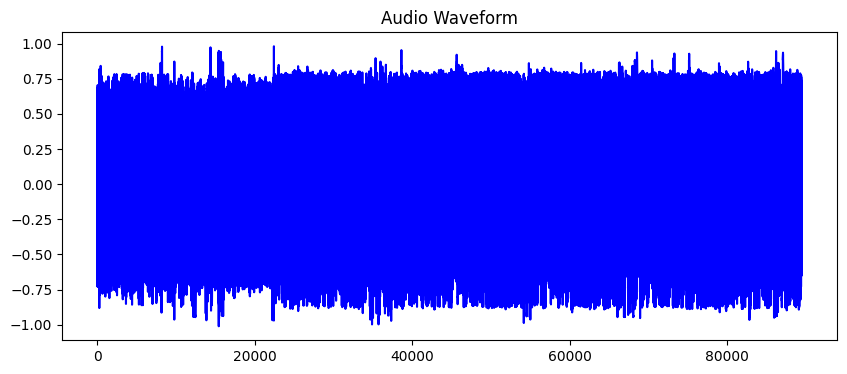

In [14]:
plt.figure(figsize=(10, 4))
plt.plot(audio_data[abs(audio_data)>0.6], color='b')
plt.title("Audio Waveform")
plt.show()

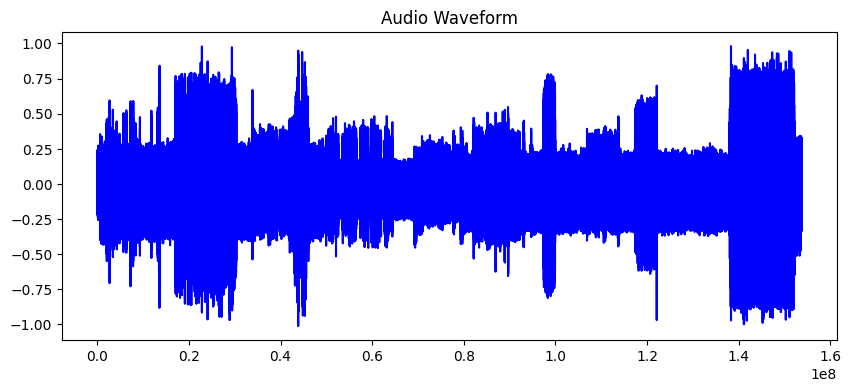

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(audio_data, color='b')
plt.title("Audio Waveform")
plt.show()

In [ ]:
import numpy as np

# Assuming you have a 1D audio array 'audio_data'
audio_data = ...

# Calculate rolling mean and standard deviation
window_size = 1000  # Adjust the window size based on your data
rolling_mean = np.convolve(audio_data, np.ones(window_size)/window_size, mode='same')
rolling_std = np.sqrt(np.convolve((audio_data - rolling_mean) ** 2, np.ones(window_size)/window_size, mode='same'))

# Set a threshold for anomaly detection
threshold = 2.0  # Adjust the threshold based on your data

# Detect anomalies
anomalies = np.where(np.abs(audio_data - rolling_mean) > threshold)

# Extract the portions with anomalies
audio_with_anomalies = audio_data[anomalies]

In [84]:
from pydub import AudioSegment
import os
import glob
import numpy as np

In [85]:
audio_path = os.path.join(temp_dir, export_path)
## dividir el audio en una cantidad de milisegundos especifico
audio = AudioSegment.from_file(audio_path)

In [86]:
# Calculate rolling mean and standard deviation
window_size = 1000  # Adjust the window size based on your data
rolling_mean = np.convolve(audio_data, np.ones(window_size)/window_size, mode='same')
rolling_std = np.sqrt(np.convolve((audio_data - rolling_mean) ** 2, np.ones(window_size)/window_size, mode='same'))

# Set a threshold for anomaly detection
threshold = 0.05  # Adjust the threshold based on your data

# Detect anomalies
anomalies = np.where(np.abs(audio_data - rolling_mean) > threshold)

# Extract the portions with anomalies
audio_with_anomalies = audio_data[anomalies]

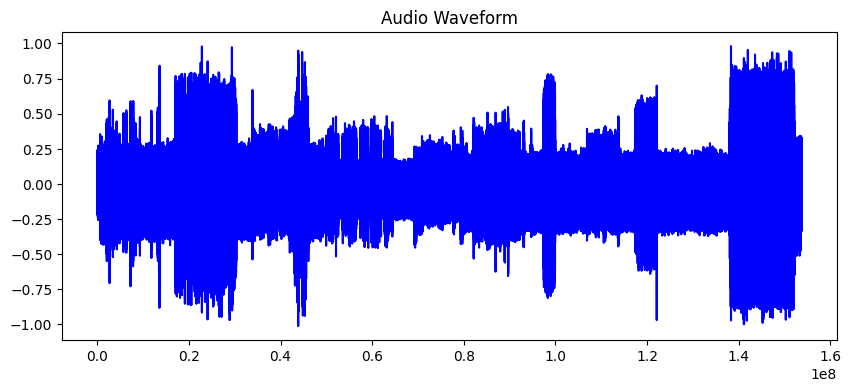

In [87]:
plt.figure(figsize=(10, 4))
plt.plot(audio_data, color='b')
plt.title("Audio Waveform")
plt.show()

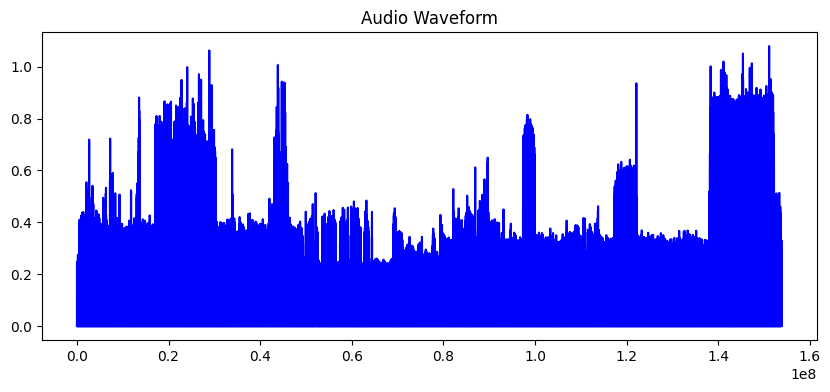

In [79]:
plt.figure(figsize=(10, 4))
plt.plot(np.abs(audio_data - rolling_mean), color='b')
plt.title("Audio Waveform")
plt.show()

In [80]:
output_file = "anomalous_audio.wav"

# Export the audio data with anomalies
sf.write(os.path.join(temp_dir, export_path), audio_with_anomalies, sample_rate)

print(f"Anomalous audio data exported to {output_file}")

Anomalous audio data exported to anomalous_audio.wav


In [81]:
non_anomalous_mask = np.ones_like(audio_data, dtype=bool)
non_anomalous_mask[anomalies] = False

# Extract non-anomalous segments
non_anomalous_audio = audio_data[non_anomalous_mask]

In [82]:
export_path_2 = "test_na.wav"

# Export the audio data with anomalies
sf.write(os.path.join(temp_dir, export_path_2), non_anomalous_audio, sample_rate)

print(f"Anomalous audio data exported to {output_file}")

Anomalous audio data exported to anomalous_audio.wav


In [1]:
import openai
import pandas as pd
import json

In [2]:
def split_text_into_chunks(text, chunk_size):
    # Split the text into words
    words = text.split()

    # Initialize an empty list to store the word chunks
    chunks = []

    # Iterate through the list of words and create chunks of the specified size
    for i in range(0, len(words), chunk_size):
        chunk = words[i:i + chunk_size]
        chunks.append(' '.join(chunk))

    return chunks

In [3]:
text_path = "../output/clean_text.txt"
api_key = json.load(open('../input/credentials.json', 'r'))['key']

In [4]:
openai.api_key = api_key

In [5]:
with open(text_path, 'r') as file:
    text = file.read()

In [6]:
text_chunks = split_text_into_chunks(text, 2000) #900

In [7]:
print(len(text_chunks))

6


In [8]:
prompts = []
for i, chunk in enumerate(text_chunks):
    #print(f"Chunk {i + 1} {len(chunk.split())}: {chunk}")
    prompt_s = """
    Dame los 2 temas principales del siguiente texto y un detalle del mismo, eliminando cualquier anuncio publicitario: {} """.format(chunk)
    prompts.append(prompt_s)

In [131]:
# Define a prompt for your conversation
conversation = [
    {"role": "system", "content": "You are a helpful news reporter."},
    {"role": "user", "content": prompts[4]},
]

In [132]:
response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",  # Use the appropriate model name
    messages=conversation,
)

In [133]:
assistant_reply = response['choices'][0]['message']['content']

In [134]:
print(assistant_reply)

Los dos temas principales del texto son:

1) Mayores demandas laborales en Perú: Específicamente en el área de mantenimiento de maquinaria pesada mecánica automotriz y Construcción Civil, así como en carreras cortas como operación de maquinaria pesada, seguridad minera, soldadura, topografía y logística.

Detalle del tema: El Perú está experimentando una mayor demanda laboral en áreas como el mantenimiento de maquinaria pesada y la construcción civil. Además de las carreras universitarias, también se destacan las carreras cortas de año y medio que ofrecen títulos a nombre de la nación y del Ministerio de Educación. Esto ofrece oportunidades tanto para aquellos que buscan emprender negocios como para quienes desean incrementar sus habilidades y conocimientos.

2) Cuestionamientos a las gestiones municipales: Se mencionan cuestionamientos sobre la creación de nuevos cargos en la Municipalidad de Cayma, incluyendo el cargo de gestión de inversión y cooperación. Se plantean dudas sobre el 

In [9]:
responses = []
for prp in prompts:

    # Define a prompt for your conversation
    conversation = [
        {"role": "system", "content": "You are a helpful news reporter."},
        {"role": "user", "content": prp},
    ]

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # Use the appropriate model name
        messages=conversation,
    )
    assistant_reply = response['choices'][0]['message']['content']
    responses.append(assistant_reply)

In [10]:
df = pd.DataFrame()
df["texto"] = text_chunks
df["respuesta"] = responses
df["interes"] = 0

In [11]:
df.to_excel("../output/resultado_nuevo.xlsx", index=False)